In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('DATAM24.csv')
df

,Region/Country/Area,Zone,Year,Series,Value
0,1,"Total, all countries or areas",2020,Population annual rate of increase (percent),0.9
1,1,"Total, all countries or areas",2020,Total fertility rate (children per women),2.3
2,1,"Total, all countries or areas",2020,"Infant mortality for both sexes (per 1,000 liv...",28.3
3,1,"Total, all countries or areas",2020,"Maternal mortality ratio (deaths per 100,000 p...",223.0
4,1,"Total, all countries or areas",2020,Life expectancy at birth for both sexes (years),72.0
...,...,...,...,...,...
1522,722,SIDS,2020,"Infant mortality for both sexes (per 1,000 liv...",29.0
1523,722,SIDS,2020,"Maternal mortality ratio (deaths per 100,000 p...",208.0
1524,722,SIDS,2020,Life expectancy at birth for both sexes (years),72.2
1525,722,SIDS,2020,Life expectancy at birth for males (years),69.3


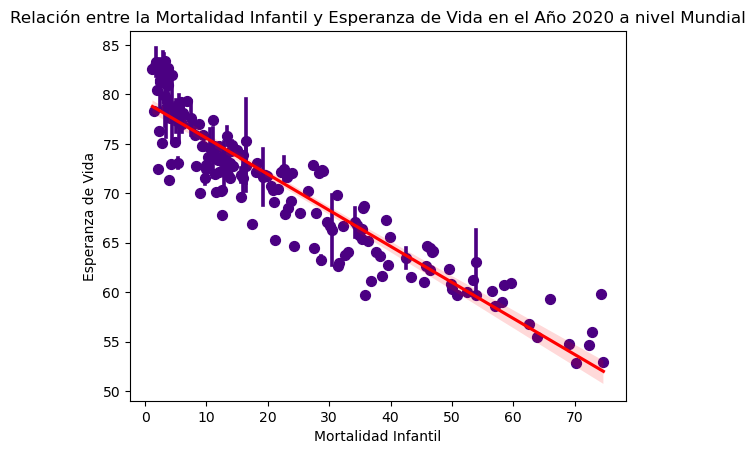

In [8]:
mortalidad_infantil = df[(df['Series'] == 'Infant mortality for both sexes (per 1,000 live births)')]
esperanza_vida = df[(df['Series'] == 'Life expectancy at birth for both sexes (years)')]

df_final = pd.merge(mortalidad_infantil[['Region/Country/Area', 'Value']],
                       esperanza_vida[['Region/Country/Area', 'Value']],
                       on='Region/Country/Area', suffixes=('_Mortalidad', '_Esperanza'))

sns.regplot(x='Value_Mortalidad', y='Value_Esperanza', data = df_final, x_estimator = np.mean, color = "indigo", line_kws = {"color": "red"})
plt.title('Relación entre la Mortalidad Infantil y Esperanza de Vida en el Año 2020 a nivel Mundial')
plt.xlabel('Mortalidad Infantil')
plt.ylabel('Esperanza de Vida')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

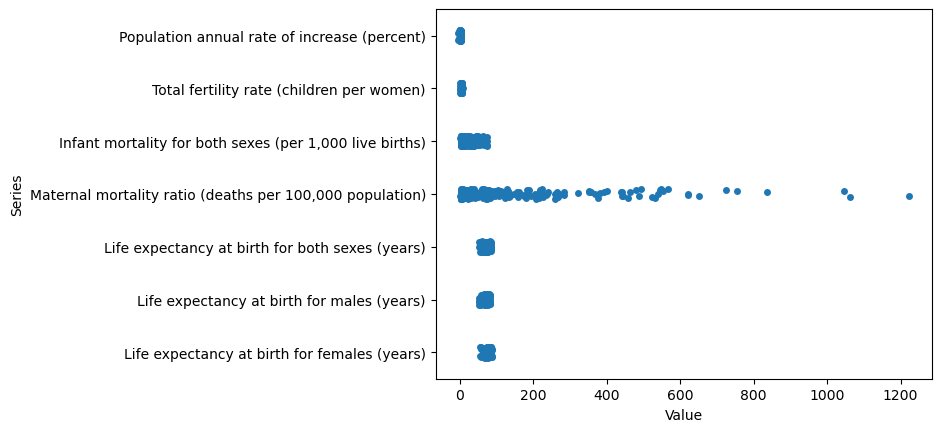

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.stripplot(data = df, y = "Series", x = "Value", jitter = True)
plt.show

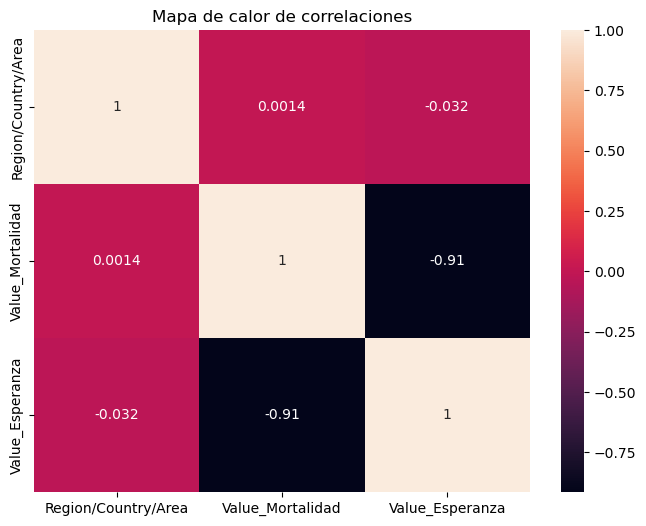

In [14]:
df_corr = df_final.corr()

plt.figure(figsize = (8,6))
sns.heatmap(df_corr, annot = True)
plt.title("Mapa de calor de correlaciones")
plt.show()

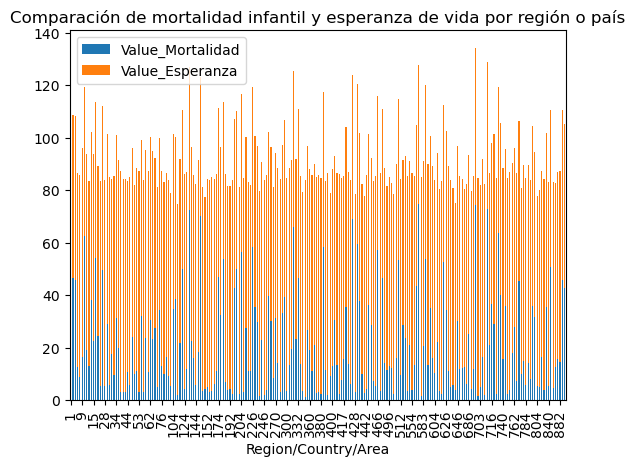

In [22]:
stack_df = df_final.groupby("Region/Country/Area").mean()
stack_df[["Value_Mortalidad", "Value_Esperanza"]].plot(kind = "bar", stacked = True)
plt.title("Comparación de mortalidad infantil y esperanza de vida por región o país")
plt.xticks(ticks = range(0, len(stack_df), 5), labels = stack_df.index[::5], rotation = 90)

plt.show()